<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Arabic Sentiment Reviews</p></b></h1>

### Tabel of Contents:

* [Import Libraries](#1)
* [Load Dataset](#2)
* [Preprocessing](#3)
* [ML Models](#4)
* [Like this? Upvote and comment! 🌊 End](#6)

**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
from tqdm import tqdm
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import cross_val_score,GridSearchCV
import pickle
# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

**<a id="2"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Load Dataset</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
dataset = pd.read_csv('/kaggle/input/330k-arabic-sentiment-reviews/arabic_sentiment_reviews.csv')
dataset.head()

,label,content
0,1,النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دا...
1,1,منتج جميل ، خدمة سيئة: لقد اشتريت زوجًا من الن...
2,1,جيد للأشياء الصغيرة: هذا يعمل بشكل جيد لالتقاط...
3,0,واهية للغاية: flimsyif للغاية ، فأنت تشتريه ، ...
4,1,Pop for Girls and Girly Boys ، والأشخاص الذين ...


In [3]:
dataset.shape

(330000, 2)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330000 entries, 0 to 329999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    330000 non-null  int64 
 1   content  330000 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.0+ MB


In [5]:
dataset.label.value_counts()

label
1    166853
0    163147
Name: count, dtype: int64

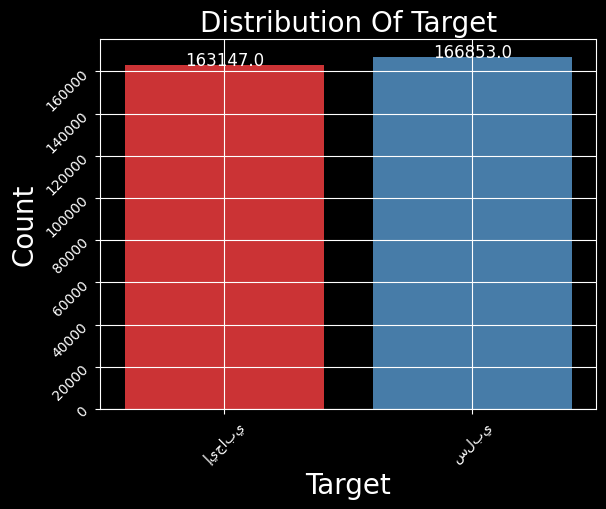

In [6]:
plt.style.use('dark_background')
ax = sns.countplot(x='label', data=dataset, palette='Set1')
plt.title('Distribution Of Target', fontsize=20)
plt.xlabel('Target', fontsize=20)
plt.ylabel('Count', fontsize=20)
ax.set_xticklabels(['إيجابي' if label == 1 else 'سلبي' for label in dataset['label'].unique()])
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12)
plt.show()

**<a id="3"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Preprocessing</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [7]:
def clean_arabic_text(text):
    # Remove non-Arabic alphabetic characters and extra whitespace
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)  # Keeps only Arabic characters and spaces
    # Convert multiple whitespace characters to a single space
    text = re.sub(r'\s+', ' ', text)
    # Remove leading and trailing spaces
    text = text.strip()
    return text

In [8]:
dataset.label[50],dataset.content[50]

(1,
 'آمين!: أوافق على أن الحلقات التجريبية يجب تضمينها في مجموعة مربع الموسم الأول ، لا يتم تقديمها هنا بمفردها.كما أنها باهظة الثمن بعض الشيء.حتى Farscape أعطاك حلقتين لعشرة دولارات عندما بدأوا في إطلاق سراح DVD والشريط.ومع ذلك ، قد يكون تاريخ الإصدار قليلاً من أدنى فكرة عن قرص DVD ثنائي القاع.على الأرجح أنهم يحاولون صقل الأعمال التجارية للعرض قبل العرض الصيفي في السنة الثانية. كما هو الحال بالنسبة للعرض ، أعجبتني ككل.منحت ، من الواضح أنها استنساخ ستارغيت.الشخصيات هي الشخصيات التي رأيناها جميعًا من قبل ، وعندما تقارنها بالأصول الأصلية ، فإنها تأتي في المرتبة الثانية.لكن لإعادة صياغة حلقة Stargate SG-1 ، كنت سأستمع إلى رودني حتى لو كان كل ما يفعله هو قراءة دفتر الهاتف ".إنه ممتع ، ما زلت أشتري هذا ، لكن غير مستعملة فقط.')

In [9]:
dataset.label[50],clean_arabic_text(dataset.content[50])

(1,
 'آمين أوافق على أن الحلقات التجريبية يجب تضمينها في مجموعة مربع الموسم الأول ، لا يتم تقديمها هنا بمفردهاكما أنها باهظة الثمن بعض الشيءحتى أعطاك حلقتين لعشرة دولارات عندما بدأوا في إطلاق سراح والشريطومع ذلك ، قد يكون تاريخ الإصدار قليلاً من أدنى فكرة عن قرص ثنائي القاععلى الأرجح أنهم يحاولون صقل الأعمال التجارية للعرض قبل العرض الصيفي في السنة الثانية كما هو الحال بالنسبة للعرض ، أعجبتني ككلمنحت ، من الواضح أنها استنساخ ستارغيتالشخصيات هي الشخصيات التي رأيناها جميعًا من قبل ، وعندما تقارنها بالأصول الأصلية ، فإنها تأتي في المرتبة الثانيةلكن لإعادة صياغة حلقة ، كنت سأستمع إلى رودني حتى لو كان كل ما يفعله هو قراءة دفتر الهاتف إنه ممتع ، ما زلت أشتري هذا ، لكن غير مستعملة فقط')

In [10]:
dataset.content = dataset.content.apply(clean_arabic_text)
dataset.head()

,label,content
0,1,النعال المريحة أرتدي هذه النعال كثيرًافهي دافئ...
1,1,منتج جميل ، خدمة سيئة لقد اشتريت زوجًا من النع...
2,1,جيد للأشياء الصغيرة هذا يعمل بشكل جيد لالتقاط ...
3,0,واهية للغاية للغاية ، فأنت تشتريه ، كن حذرًا ج...
4,1,، والأشخاص الذين يحبون الضحك عليك فقط أن تبتسم...


In [11]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(dataset.content)
train = pd.DataFrame.sparse.from_spmatrix(X_train_tfidf, columns=tfidf.get_feature_names_out())
train.head()

,آخذ,آخر,آخرون,آخرين,آدم,آرثر,آسف,آشلي,آلان,آلة,...,يهم,يهمني,يواجه,يوجد,يوصي,يوضح,يوفر,يوم,يومي,يومين
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.117492,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [13]:
### Split
X_train, X_test, y_train, y_test = train_test_split(train, dataset.label, test_size=0.05, random_state=44, shuffle =True,stratify=dataset.label)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (313500, 5000)
X_test shape is  (16500, 5000)
y_train shape is  (313500,)
y_test shape is  (16500,)


**<a id="4"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">ML Models</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [14]:
summary = {}

def models(model, name, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Train accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print metrics
    print(f'Train Accuracy: {train_accuracy:.2f}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    
    # Confusion matrix
    CM = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix is : \n', CM)
    
    # Classification report
    ClassificationReport = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
    print('Classification Report is : \n', ClassificationReport)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 5))
    sns.heatmap(data=CM, annot=True, fmt='g', cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.title(f'Confusion Matrix for {name} Algorithm')
    plt.show()
    
    # Save the model
    with open(f'{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    # Store summary
    summary[name] = {
        'Train Accuracy': train_accuracy,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

Train Accuracy: 1.00
Accuracy: 0.83
Precision: 0.84
Recall: 0.82
F1-Score: 0.83
Confusion Matrix is : 
 [[6865 1292]
 [1509 6834]]
Classification Report is : 
               precision    recall  f1-score   support

    Negative       0.82      0.84      0.83      8157
    Positive       0.84      0.82      0.83      8343

    accuracy                           0.83     16500
   macro avg       0.83      0.83      0.83     16500
weighted avg       0.83      0.83      0.83     16500



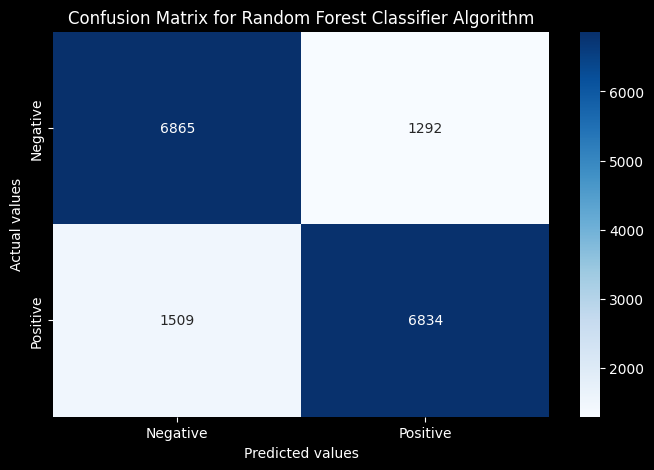

In [15]:
# Random Forest Classifier
models(RandomForestClassifier(n_estimators=100, criterion='entropy'), 'Random Forest Classifier', X_train, y_train, X_test, y_test)

Train Accuracy: 0.85
Accuracy: 0.84
Precision: 0.82
Recall: 0.86
F1-Score: 0.84
Confusion Matrix is : 
 [[6631 1526]
 [1196 7147]]
Classification Report is : 
               precision    recall  f1-score   support

    Negative       0.85      0.81      0.83      8157
    Positive       0.82      0.86      0.84      8343

    accuracy                           0.84     16500
   macro avg       0.84      0.83      0.83     16500
weighted avg       0.84      0.84      0.83     16500



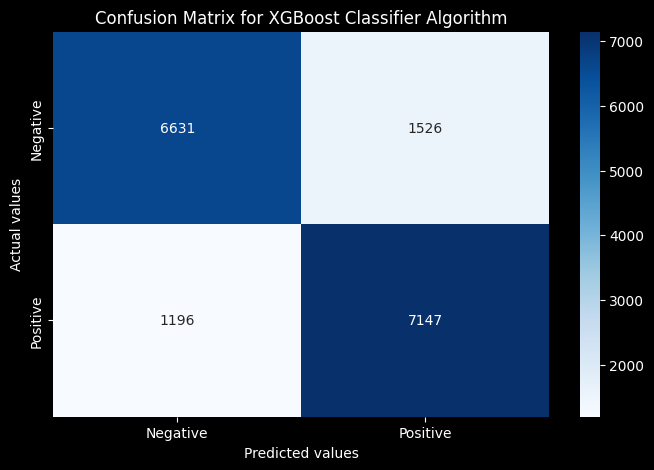

In [16]:
# XGBoost Classifier
models(XGBClassifier(), 'XGBoost Classifier', X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 158510, number of negative: 154990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.783458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845921
[LightGBM] [Info] Number of data points in the train set: 313500, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505614 -> initscore=0.022457
[LightGBM] [Info] Start training from score 0.022457
Train Accuracy: 0.84
Accuracy: 0.84
Precision: 0.83
Recall: 0.85
F1-Score: 0.84
Confusion Matrix is : 
 [[6698 1459]
 [1229 7114]]
Classification Report is : 
               precision    recall  f1-score   support

    Negative       0.84      0.82      0.83      8157
    Positive       0.83      0.85      0.84      8343

    accuracy                           0.84     16500
   macro avg       0.84      0.84      0.84     16500
weigh

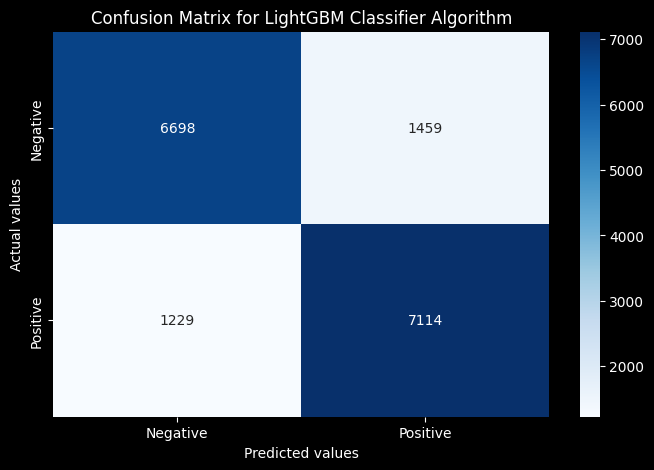

In [17]:
# LightGBM Classifier
models(LGBMClassifier(), 'LightGBM Classifier', X_train, y_train, X_test, y_test)

Train Accuracy: 1.00
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1-Score: 0.73
Confusion Matrix is : 
 [[5898 2259]
 [2272 6071]]
Classification Report is : 
               precision    recall  f1-score   support

    Negative       0.72      0.72      0.72      8157
    Positive       0.73      0.73      0.73      8343

    accuracy                           0.73     16500
   macro avg       0.73      0.73      0.73     16500
weighted avg       0.73      0.73      0.73     16500



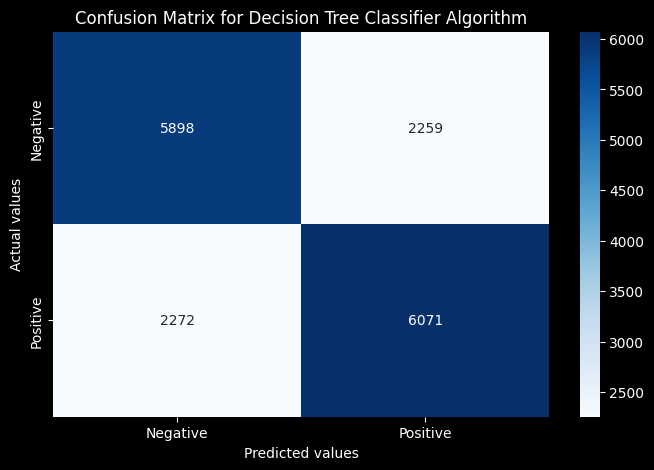

In [18]:
# Decision Tree Classifier
models(DecisionTreeClassifier(), 'Decision Tree Classifier', X_train, y_train, X_test, y_test)

In [19]:
### Summary
metrics_df = pd.DataFrame(summary).transpose()
metrics_df

,Train Accuracy,Accuracy,Precision,Recall,F1-Score
Random Forest Classifier,0.999649,0.830242,0.841004,0.819130,0.829923
XGBoost Classifier,0.850392,0.835030,0.824052,0.856646,0.840033
LightGBM Classifier,0.839837,0.837091,0.829815,0.852691,0.841097
Decision Tree Classifier,0.999649,0.725394,0.728812,0.727676,0.728243


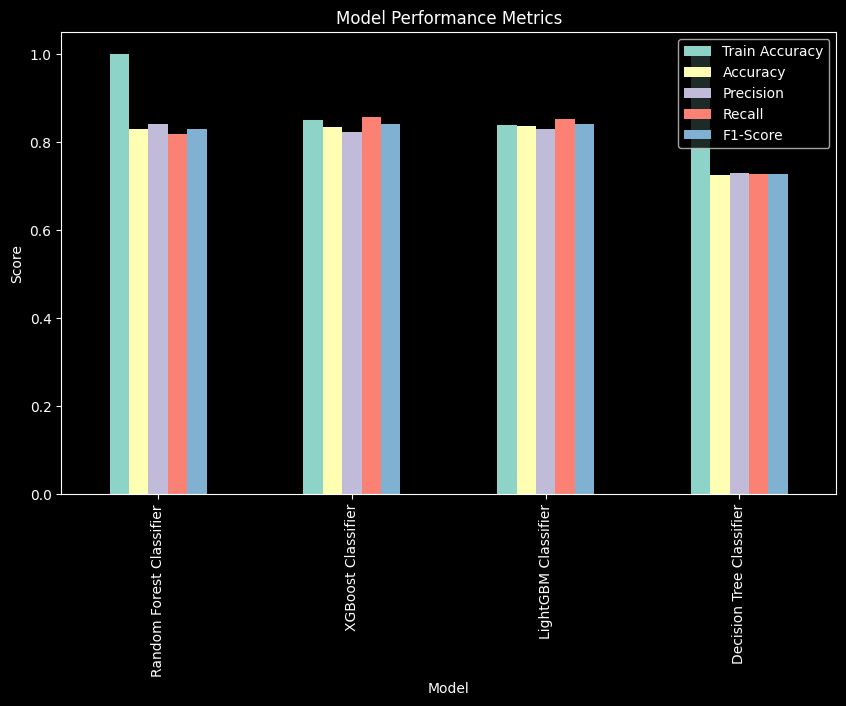

In [20]:
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()

**<a id="6"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Like this? Upvote and comment! 🌊 End</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>